# 1. Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

# 2. 데이터 불러오기 및 확인

In [60]:
df_hitter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/hitter_salary_debut.csv')

In [4]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      535 non-null    int64  
 1   선수명     535 non-null    object 
 2   팀명      535 non-null    object 
 3   AVG     535 non-null    float64
 4   G       535 non-null    int64  
 5   PA      535 non-null    int64  
 6   AB      535 non-null    int64  
 7   R       535 non-null    int64  
 8   H       535 non-null    int64  
 9   2B      535 non-null    int64  
 10  3B      535 non-null    int64  
 11  HR      535 non-null    int64  
 12  TB      535 non-null    int64  
 13  RBI     535 non-null    int64  
 14  SAC     535 non-null    int64  
 15  SF      535 non-null    int64  
 16  BB      535 non-null    int64  
 17  IBB     535 non-null    int64  
 18  HBP     535 non-null    int64  
 19  SO      535 non-null    int64  
 20  GDP     535 non-null    int64  
 21  SLG     535 non-null    float64
 22  OB

In [61]:
df_pf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/pitcher_meanERA_parkfactor.csv')

df_pf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   순위              444 non-null    int64  
 1   선수명             444 non-null    object 
 2   팀명              444 non-null    object 
 3   ERA             444 non-null    float64
 4   G               444 non-null    int64  
 5   W               444 non-null    int64  
 6   L               444 non-null    int64  
 7   SV              444 non-null    int64  
 8   HLD             444 non-null    int64  
 9   WPCT            444 non-null    float64
 10  IP              444 non-null    float64
 11  H               444 non-null    float64
 12  HR              444 non-null    int64  
 13  BB              444 non-null    int64  
 14  HBP             444 non-null    int64  
 15  SO              444 non-null    int64  
 16  R               444 non-null    int64  
 17  ER              444 non-null    int

In [62]:
df_pf = df_pf[['연도','팀명','park_factor']].drop_duplicates().reset_index()

In [63]:
league = {
    '리그평균출루율' : [0.349,0.346,0.333,0.338],
    '리그평균장타율' : [0.409,0.383,0.379,0.374],
    '연도' : [2020, 2021, 2022, 2023]
}

df_league = pd.DataFrame(league)

In [64]:
def calculate_ops_plus(df_hitter):
    slg = df_hitter['SLG'] / (df_league.loc[df_league['연도'] == df_hitter['연도'],'리그평균장타율'].values[0])

    obp = df_hitter['OBP'] / (df_league.loc[df_league['연도'] == df_hitter['연도'],'리그평균출루율'].values[0])
    pf = df_pf.loc[(df_pf['연도']==df_hitter['연도']) & (df_pf['팀명'] == df_hitter['팀명']),'park_factor'].values[0]

    ops_plus = (slg + obp - 1) * 100 / pf
    return ops_plus

df_hitter['OPS+'] = df_hitter.apply(calculate_ops_plus, axis=1)

In [120]:
df_hitter.info()
df_hitter.to_csv('htter_salary_stats_debut.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      535 non-null    int64  
 1   선수명     535 non-null    object 
 2   팀명      535 non-null    object 
 3   AVG     535 non-null    float64
 4   G       535 non-null    int64  
 5   PA      535 non-null    int64  
 6   AB      535 non-null    int64  
 7   R       535 non-null    int64  
 8   H       535 non-null    int64  
 9   2B      535 non-null    int64  
 10  3B      535 non-null    int64  
 11  HR      535 non-null    int64  
 12  TB      535 non-null    int64  
 13  RBI     535 non-null    int64  
 14  SAC     535 non-null    int64  
 15  SF      535 non-null    int64  
 16  BB      535 non-null    int64  
 17  IBB     535 non-null    int64  
 18  HBP     535 non-null    int64  
 19  SO      535 non-null    int64  
 20  GDP     535 non-null    int64  
 21  SLG     535 non-null    float64
 22  OB

In [66]:
df = df_hitter.drop( ['연도','순위','선수명','팀명'] ,axis=1)

df.describe()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차,OPS+
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.242138,84.489720,275.267290,240.028037,34.022430,64.385047,11.022430,1.022430,5.332710,93.450467,...,0.318148,0.663002,16.115888,0.242198,0.214473,25025.663551,1.406336,25481.738318,8.545794,0.083080
std,0.068091,43.120068,199.317472,173.470656,27.689684,51.973392,9.892278,1.653354,7.004918,78.296427,...,0.071765,0.172363,14.922824,0.108728,0.238355,42212.847498,1.920611,37783.821164,5.321258,0.046593
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2700.000000,-2.480000,3000.000000,1.000000,-0.103199
25%,0.215500,47.000000,85.500000,74.000000,10.000000,17.000000,2.000000,0.000000,0.000000,22.000000,...,0.289000,0.590500,3.000000,0.200000,0.000000,3400.000000,-0.040000,4500.000000,4.000000,0.064144
50%,0.251000,92.000000,258.000000,224.000000,28.000000,54.000000,9.000000,0.000000,3.000000,79.000000,...,0.327000,0.684000,12.000000,0.260000,0.182000,7200.000000,0.610000,9000.000000,8.000000,0.088491
75%,0.284000,123.000000,463.500000,406.000000,53.000000,110.500000,18.000000,1.000000,7.000000,153.500000,...,0.362000,0.765500,27.000000,0.305500,0.333000,26000.000000,2.570000,30000.000000,12.000000,0.110818
max,0.750000,144.000000,651.000000,570.000000,115.000000,192.000000,46.000000,11.000000,35.000000,313.000000,...,0.750000,1.750000,59.000000,1.000000,1.000000,270000.000000,7.910000,270000.000000,24.000000,0.376648


<Axes: >

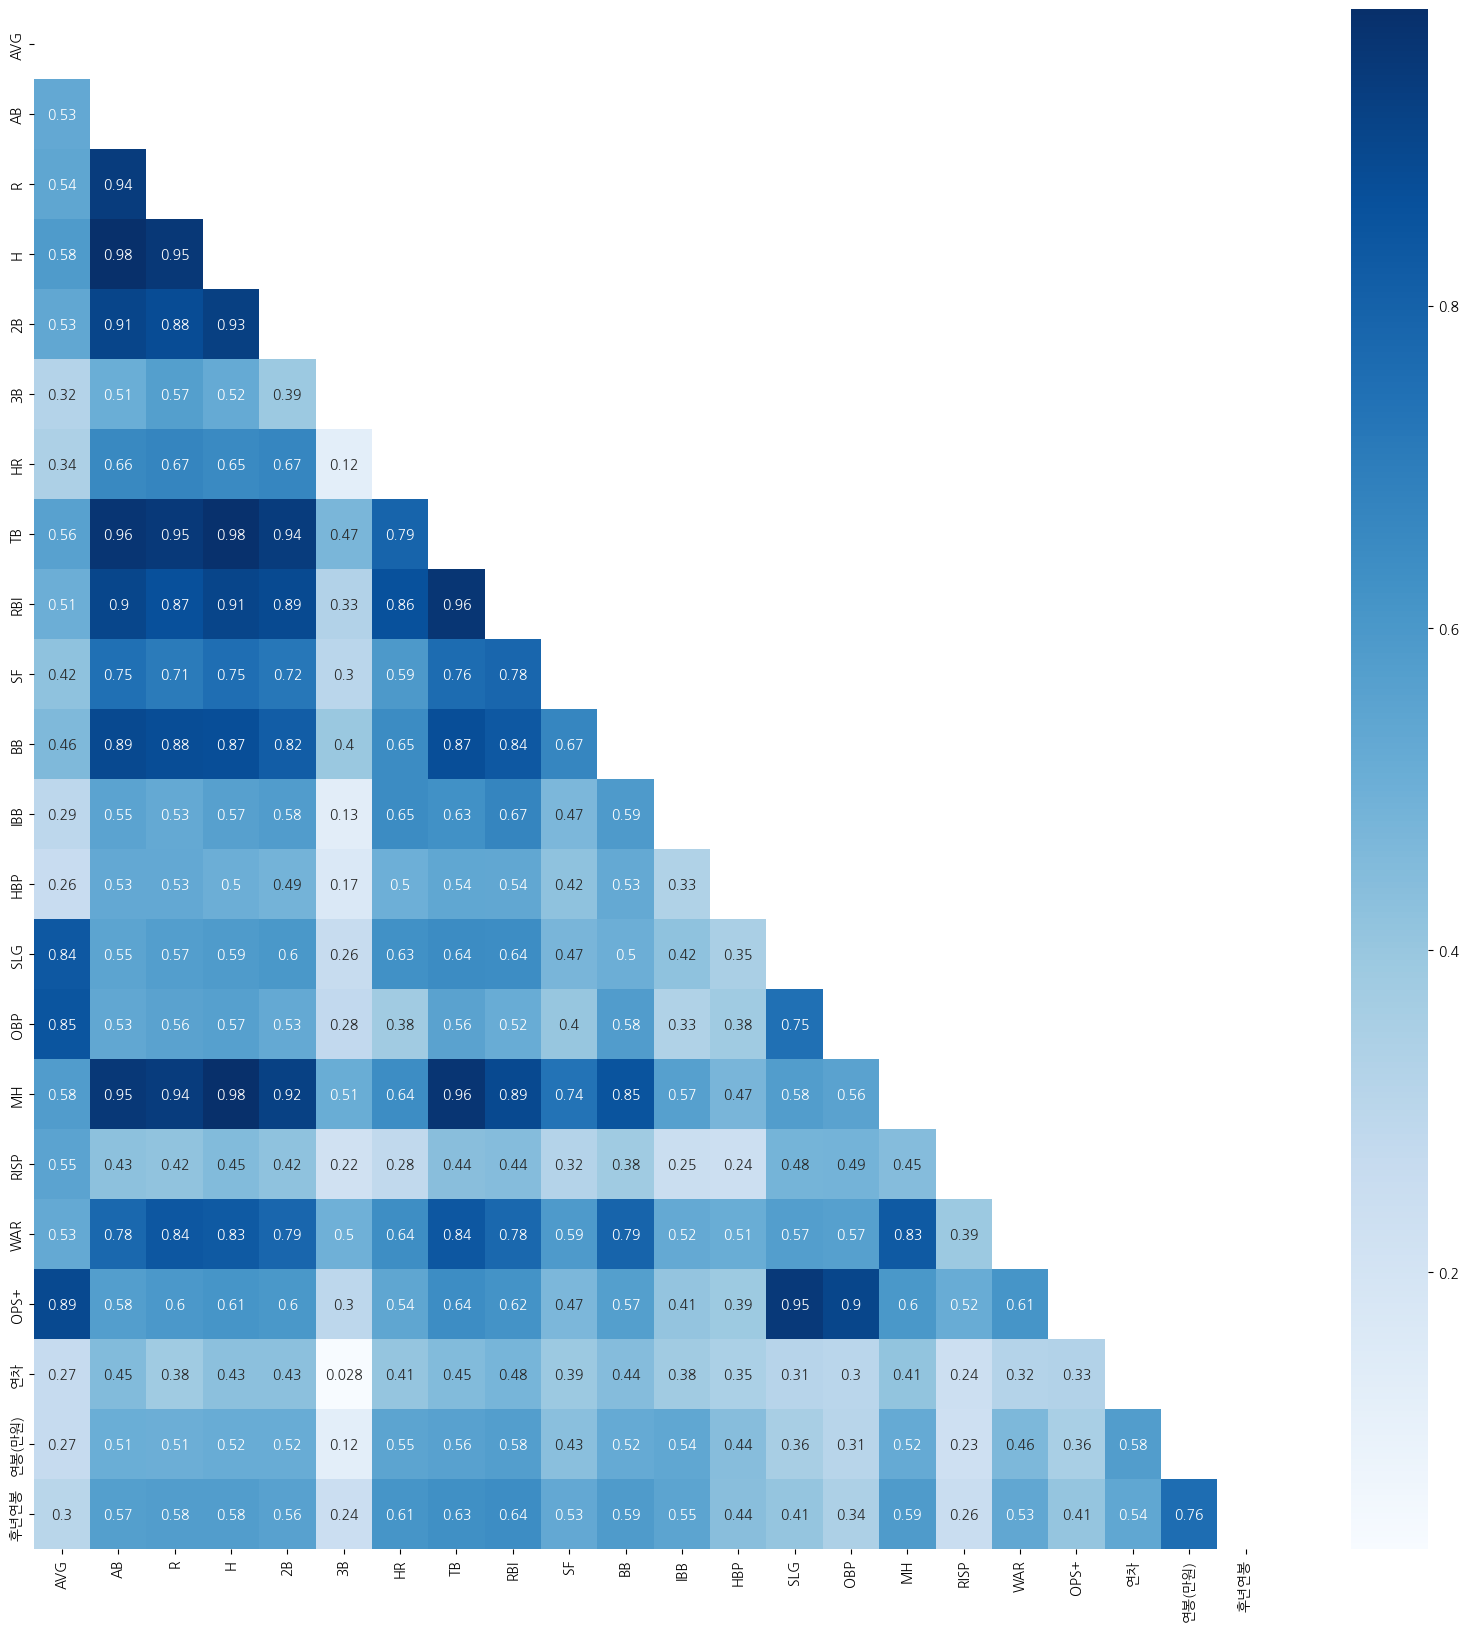

In [59]:
import numpy as np

plt.figure(figsize=(10,10))

df_corr = df_hitter[['AVG', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI',
       'SF', 'BB', 'IBB', 'HBP', 'SLG', 'OBP', 'MH', 'RISP',
       'WAR', 'OPS+','연차','연봉(만원)','후년연봉']].corr()

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.triu(df_corr)

sns.heatmap(df_corr,
            cmap='Blues',
            annot=True,
            mask=mask, )

# 4. 연봉 구간 다중 분류 모델링

## 4.1 기존 연봉을 연봉 구간으로 나누기

In [15]:
df_hitter['후년연봉'].describe()

,후년연봉
count,535.000000
mean,25481.738318
std,37783.821164
min,3000.000000
25%,4500.000000
50%,9000.000000
75%,30000.000000
max,270000.000000


In [67]:
import pandas as pd

# '후년연봉'을 4분위로 나누어 4개의 집단으로 분류
df_hitter['연봉구간'] = pd.qcut(df_hitter['후년연봉'], q=4, labels=False)

# 각 군집의 경계 확인
cluster_ranges = []
for i in range(df_hitter['연봉구간'].nunique()):
    cluster_min = df_hitter[df_hitter['연봉구간'] == i]['후년연봉'].min()
    cluster_max = df_hitter[df_hitter['연봉구간'] == i]['후년연봉'].max()
    cluster_ranges.append((cluster_min, cluster_max))

# 결과 출력
df_hitter[['후년연봉', '연봉구간']].head(), cluster_ranges

(    후년연봉  연봉구간
 0  50000     3
 1  60000     3
 2  60000     3
 3  40000     3
 4  31000     3,
 [(3000, 4500), (4700, 9000), (9200, 30000), (31000, 270000)])

In [68]:
df_hitter['연봉구간'].value_counts()

,count
연봉구간,
2,148
0,138
1,131
3,118


## 4.2 전체 컬럼으로 모델링

In [69]:
X = df_hitter.drop(['순위','팀명','선수명','SO','연도','후년연봉','연봉구간'],axis=1)
y = df_hitter['연봉구간']

In [21]:
df_hitter.to_csv('hitter_final2.csv',index=False)

In [70]:
X.shape

(535, 27)

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVG     535 non-null    float64
 1   G       535 non-null    int64  
 2   PA      535 non-null    int64  
 3   AB      535 non-null    int64  
 4   R       535 non-null    int64  
 5   H       535 non-null    int64  
 6   2B      535 non-null    int64  
 7   3B      535 non-null    int64  
 8   HR      535 non-null    int64  
 9   TB      535 non-null    int64  
 10  RBI     535 non-null    int64  
 11  SAC     535 non-null    int64  
 12  SF      535 non-null    int64  
 13  BB      535 non-null    int64  
 14  IBB     535 non-null    int64  
 15  HBP     535 non-null    int64  
 16  GDP     535 non-null    int64  
 17  SLG     535 non-null    float64
 18  OBP     535 non-null    float64
 19  OPS     535 non-null    float64
 20  MH      535 non-null    int64  
 21  RISP    535 non-null    float64
 22  PH

#### 4.2.1 train과 test 분리

In [72]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 252 to 192
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVG     374 non-null    float64
 1   G       374 non-null    int64  
 2   PA      374 non-null    int64  
 3   AB      374 non-null    int64  
 4   R       374 non-null    int64  
 5   H       374 non-null    int64  
 6   2B      374 non-null    int64  
 7   3B      374 non-null    int64  
 8   HR      374 non-null    int64  
 9   TB      374 non-null    int64  
 10  RBI     374 non-null    int64  
 11  SAC     374 non-null    int64  
 12  SF      374 non-null    int64  
 13  BB      374 non-null    int64  
 14  IBB     374 non-null    int64  
 15  HBP     374 non-null    int64  
 16  GDP     374 non-null    int64  
 17  SLG     374 non-null    float64
 18  OBP     374 non-null    float64
 19  OPS     374 non-null    float64
 20  MH      374 non-null    int64  
 21  RISP    374 non-null    float64
 22  PH-BA

#### 4.2.2  모델링

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
from sklearn.metrics import accuracy_score

# test 데이터 예측
y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)


# 정확도 계산
print(f'Train Accuracy : {model.score(X_train, y_train)}')
print(f'Test Accuracy  : {model.score(X_test, y_test)}')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Train Accuracy : 1.0
Test Accuracy  : 0.8260869565217391
Accuracy : 0.8260869565217391


**과적합**

## 4.3 상관관계 높은 컬럼들 추출

In [125]:
from sklearn.model_selection import train_test_split


data = df_hitter[['TB', 'R', 'H', '2B', 'HR', 'RBI', 'SF', 'BB', 'IBB', 'HBP', 'SLG', 'MH', 'WAR','연차','연봉(만원)']]
target = df_hitter['연봉구간']

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.3,
    random_state=0
)

In [110]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
params = {
    'n_estimators': [100,300,400],       # 생성할 결정 트리 개수 ( 10, 100, 300 돌렸을 때 300 나와서 크기 늘려서 다시 진행 )
    'max_depth': [6, 8, 10, 12],             # 각 트리의 최대 깊이
    'min_samples_leaf': [8, 12, 18],         # 리프 노드가 되기 위한 최소 샘플 수
    'min_samples_split': [8, 16, 20,24]      # 내부 노드를 분할하기 위한 최소 샘플 수
}

# # RandomForestClassifier 객체 생성 (random_state로 결과 재현 가능, n_jobs로 병렬 처리)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# # GridSearchCV 객체 생성 (cv로 교차 검증의 fold 수 설정)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)

# # 학습 데이터로 GridSearchCV 실행 (최적의 하이퍼파라미터 탐색)
grid_cv.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

# # 최고 예측 정확도 출력
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8100


In [126]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 6, min_samples_leaf = 8, min_samples_split = 20, n_estimators= 100)

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20)

In [127]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# train 데이터 예측
y_train_pred = model.predict(X_train)

# test 데이터 예측
y_test_pred = model.predict(X_test)

# 정확도 계산
print(f'Train Accuracy : {model.score(X_train, y_train)}')
print(f'Test Accuracy  : {model.score(X_test, y_test)}')

# 훈련 데이터 예측 평가
train_accuracy = accuracy_score(y_train,y_train_pred)
train_f1 = f1_score(y_train,y_train_pred, average = 'weighted')
train_precision = precision_score(y_train,y_train_pred, average = 'weighted')
train_recall = recall_score(y_train,y_train_pred, average = 'weighted')

# 테스트 데이터 예측 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
test_precision = precision_score(y_test, y_test_pred, average = 'weighted')
test_recall = recall_score(y_test, y_test_pred, average = 'weighted')



print(f"Train 정확도 : {train_accuracy}")
print(f"Train 정밀도 : {train_precision}")
print(f"Train 재현율 : {train_recall}")
print(f'Train F1 score : {train_f1}')

print(f"Test 정확도 : {test_accuracy}")
print(f"Test 정밀도 : {test_precision}")
print(f"Test 재현율 : {test_recall}")
print(f'Test F1 score : {test_f1}')


Train Accuracy : 0.8850267379679144
Test Accuracy  : 0.8260869565217391
Train 정확도 : 0.8850267379679144
Train 정밀도 : 0.8857288163625339
Train 재현율 : 0.8850267379679144
Train F1 score : 0.8852710442737316
Test 정확도 : 0.8260869565217391
Test 정밀도 : 0.8409134511618983
Test 재현율 : 0.8260869565217391
Test F1 score : 0.8294432265659887


In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.79      0.76      0.78        34
           2       0.70      0.85      0.76        46
           3       0.89      0.77      0.82        43

    accuracy                           0.82       161
   macro avg       0.84      0.82      0.82       161
weighted avg       0.83      0.82      0.82       161



## 4.4 상관관계 높은 컬럼들 중 Feature Importances 확인해 모델링

In [98]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(max_depth = 6, min_samples_leaf = 8, min_samples_split = 20, n_estimators= 400)

rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_

# Series로 만들어 인덱스를 붙인다
imp = pd.Series(importances, index=data.columns)

# 내림차순 정렬
top15 = imp.sort_values(ascending=False)[1:16]
print(top15)

H      0.107085
TB     0.091361
TB     0.089399
RBI    0.088268
MH     0.073666
연차     0.059459
R      0.039456
IBB    0.030289
BB     0.029884
2B     0.022622
WAR    0.021470
SLG    0.015181
HR     0.008689
HBP    0.003946
SF     0.003802
dtype: float64


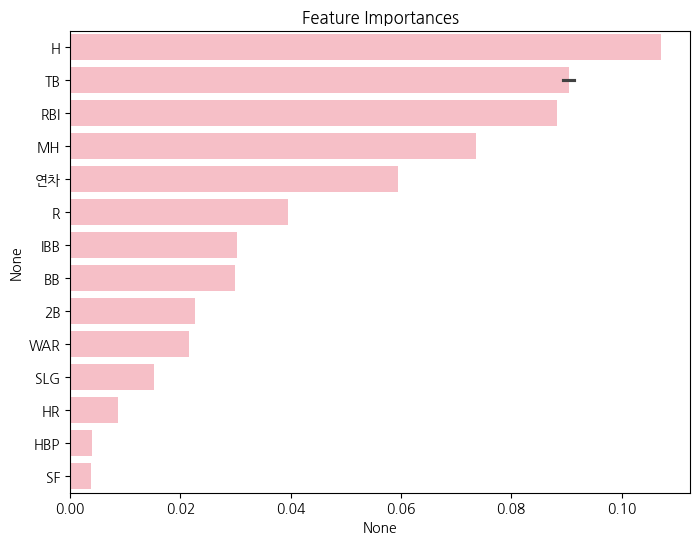

In [99]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=top15, y=top15.index,color='lightpink')
plt.show()

In [100]:
top15.index

Index(['H', 'TB', 'TB', 'RBI', 'MH', '연차', 'R', 'IBB', 'BB', '2B', 'WAR',
       'SLG', 'HR', 'HBP', 'SF'],
      dtype='object')

# 4.4

In [106]:
from sklearn.model_selection import train_test_split


data = df_hitter[['H', 'TB', 'TB', 'RBI', 'MH', '연차', 'R', 'IBB', 'BB', '2B', 'WAR','연봉(만원)']]
target = df_hitter['연봉구간']

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.3,
    random_state=0
)

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 6, min_samples_leaf = 8, min_samples_split = 8, n_estimators= 300)

model.fit(X_train,y_train)


# train 데이터 예측
y_train_pred = model.predict(X_train)

# test 데이터 예측
y_test_pred = model.predict(X_test)

# 정확도 계산
print(f'Train Accuracy : {model.score(X_train, y_train)}')
print(f'Test Accuracy  : {model.score(X_test, y_test)}')

# 훈련 데이터 예측 평가
train_accuracy = accuracy_score(y_train,y_train_pred)
train_f1 = f1_score(y_train,y_train_pred, average = 'weighted')
train_precision = precision_score(y_train,y_train_pred, average = 'weighted')
train_recall = recall_score(y_train,y_train_pred, average = 'weighted')

# 테스트 데이터 예측 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
test_precision = precision_score(y_test, y_test_pred, average = 'weighted')
test_recall = recall_score(y_test, y_test_pred, average = 'weighted')



print(f"Train 정확도 : {train_accuracy}")
print(f"Train 정밀도 : {train_precision}")
print(f"Train 재현율 : {train_recall}")
print(f'Train F1 score : {train_f1}')

print(f"Test 정확도 : {test_accuracy}")
print(f"Test 정밀도 : {test_precision}")
print(f"Test 재현율 : {test_recall}")
print(f'Test F1 score : {test_f1}')


Train Accuracy : 0.9010695187165776
Test Accuracy  : 0.8136645962732919
Train 정확도 : 0.9010695187165776
Train 정밀도 : 0.9025104239814897
Train 재현율 : 0.9010695187165776
Train F1 score : 0.9013403082781793
Test 정확도 : 0.8136645962732919
Test 정밀도 : 0.8272312719285693
Test 재현율 : 0.8136645962732919
Test F1 score : 0.8163892513669215


--> 상관계수 높은 컬럼들과 비교했을 때 점수에 큰 차이가 없음!  
**최종적으로 상관계수 높은 컬럼들로 돌린 모델링 선정**